<a href="https://colab.research.google.com/github/afianidewi/Credit-Card-Campaign-Analysis/blob/main/Credit_Card_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from scipy.stats import ttest_rel, ttest_ind

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/dataset_credit_card.csv')

In [4]:
df

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2
...,...,...,...,...,...,...,...,...,...,...
195,31,1,2,2,2,1,55,59,62.4,64.9
196,145,1,4,2,1,3,42,46,45.6,50.6
197,187,1,4,2,2,1,57,41,68.4,45.1
198,118,1,4,2,1,1,55,62,69.6,68.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [6]:
df.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


In [7]:
dict_sex = {
    0: 'Laki-laki',
    1: 'Perempuan'
}

In [8]:
df['sex'] = df['sex'].replace(dict_sex)
df['sex']

,sex
0,Laki-laki
1,Perempuan
2,Laki-laki
3,Laki-laki
4,Laki-laki
...,...
195,Perempuan
196,Perempuan
197,Perempuan
198,Perempuan


In [9]:
dict_Marital_status = {
    1: 'Single',
    2: 'Menikah'
}

In [10]:
df['Marital_status'] = df['Marital_status'].replace(dict_Marital_status)
df['Marital_status']

,Marital_status
0,Single
1,Single
2,Single
3,Single
4,Single
...,...
195,Menikah
196,Single
197,Menikah
198,Single


In [11]:
df.head(5)

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,Laki-laki,4,1,Single,1,57,52,49.2,57.2
1,121,Perempuan,4,2,Single,3,68,59,63.6,64.9
2,86,Laki-laki,4,3,Single,1,44,33,64.8,36.3
3,141,Laki-laki,4,3,Single,3,63,44,56.4,48.4
4,172,Laki-laki,4,2,Single,2,47,52,68.4,57.2


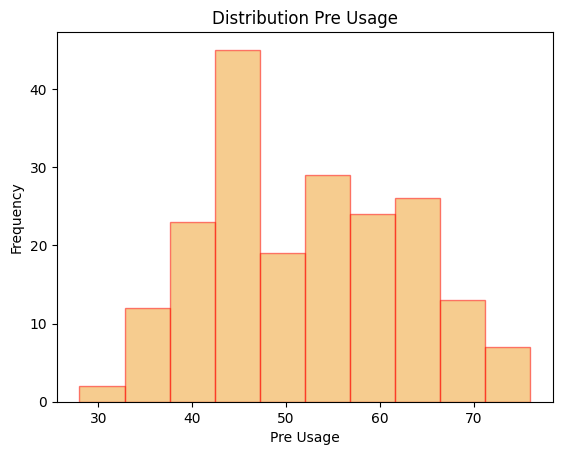

In [12]:
# Histogram Persebaran Data
plt.hist(df['pre_usage'],
         facecolor = '#ef9b20',
         edgecolor = 'red',
         bins=10,
         alpha=0.5)
plt.title('Distribution Pre Usage')
plt.xlabel('Pre Usage')
plt.ylabel('Frequency')
plt.show()

Distribusi terlihat cukup menyebar, namun mayoritas nasabah berada di kisaran 40 - 60. Tidak terlihat skewness yang ekstrem, sebelum campaign sebagian besar nasabah memiliki tingkat penggunaan sedang yang mana terdapat kesempatan untuk meningkatkan transaksi melalui campaign karena belum banyak nasabah yang berada di level penggunaan tinggi.

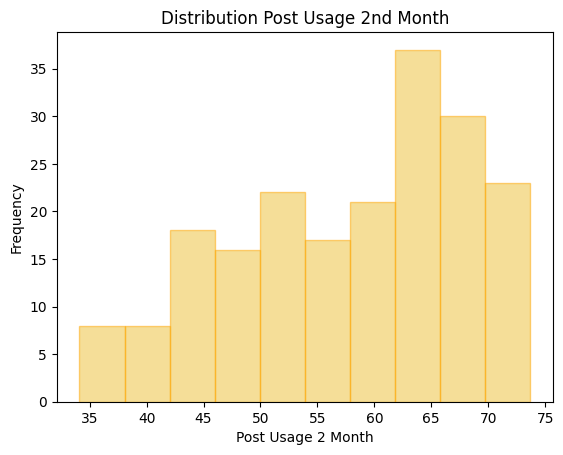

In [13]:
plt.hist(df['post_usage_2ndmonth'],
         facecolor = '#edbf33',
         edgecolor = 'orange',
         bins=10,
         alpha=0.5)
plt.title('Distribution Post Usage 2nd Month')
plt.xlabel('Post Usage 2 Month')
plt.ylabel('Frequency')
plt.show()

Dibandingkan dengan pre_usage, terlihat bahwa lebih banyak nasabah yang berada pada tingkat penggunaan yang lebih tinggi. Hal ini mengindikasikan bahwa campaign mulai menunjukkan dampak yang lebih signifikan pada bulan ke 2. Pergeseran distribusi ke kanan menunjukkan adanya peningkatan penggunaan kartu kredit yang cukup tinggi.

In [14]:
H0 = 'Tidak ada perbedaan signifikan antara sebelum dan 1 bulan setelah campaign'
H1 = 'Ada perbedaan penggunaan antara sebelum dan 1 bulan setelah campaign'

stat1, pValue = ttest_rel(df['pre_usage'], df['Post_usage_1month'])

print("T-statistic:", stat1)
print("P-value:", pValue)

alpha = 0.05

if pValue < alpha:
    print(H1)
else:
    print(H0)


T-statistic: -0.8673065458794775
P-value: 0.3868186820914985
Tidak ada perbedaan signifikan antara sebelum dan 1 bulan setelah campaign


**Kesimpulan**: Karena p-value (0.3868) > 0.05, maka gagal menolak H0.
Artinya tidak terdapat bukti yang cukup untuk menyatakan bahwa terdapat perbedaan penggunaan kartu kredit sebelum dan 1 bulan setelah campaign.
Dengan demikian, campaign belum terbukti meningkatkan penggunaan kartu kredit pada bulan pertama

In [15]:
H0 = 'Tidak ada perbedaan signifikan antara sebelum dan 2 bulan setelah campaign'
H1 = 'Ada perbedaan penggunaan antara sebelum dan 2 bulan setelah campaign'

stat2, pValue = ttest_rel(df['pre_usage'], df['post_usage_2ndmonth'])

print("T-statistic:", stat2)
print("P-value:", pValue)

alpha = 0.05

if pValue < alpha:
    print(H1)
else:
    print(H0)

T-statistic: -8.866832246938742
P-value: 4.295733828012836e-16
Ada perbedaan penggunaan antara sebelum dan 2 bulan setelah campaign


**Kesimpulan**: Karena p-value (4.29e-16) < 0.05, maka H0 ditolak.
Artinya terdapat perbedaan yang signifikan antara penggunaan kartu kredit sebelum campaign dan 2 bulan setelah campaign.
Sehingga, campaign terbukti memberikan dampak terhadap peningkatan penggunaan kartu kredit pada bulan ke 2

In [16]:
male = df[df['sex'] == 'Laki-laki']
female = df[df['sex'] == 'Perempuan']

H0 = 'Tidak ada perbedaan penggunaan kartu kredit antara laki-laki dan perempuan setelah 1 bulan campaign'
H1 = 'Ada perbedaan penggunaan kartu kredit antara laki-laki dan perempuan setelah 1 bulan campaign'

stat1, pValue = ttest_ind(male['Post_usage_1month'],
                      female['Post_usage_1month'],
                      equal_var=False)

print("T-statistic:", stat1)
print("P-value:", pValue)

alpha = 0.05

if pValue < alpha:
    print(H1)
else:
    print(H0)

T-statistic: -3.656408047887528
P-value: 0.000340884935942662
Ada perbedaan penggunaan kartu kredit antara laki-laki dan perempuan setelah 1 bulan campaign


In [17]:
H0 = 'Tidak ada perbedaan penggunaan kartu kredit antara laki-laki dan perempuan setelah 2 bulan campaign'
H1 = 'Ada perbedaan penggunaan kartu kredit antara laki-laki dan perempuan setelah 2 bulan campaign'

stat2, pValue = ttest_ind(male['post_usage_2ndmonth'],
                      female['post_usage_2ndmonth'],
                      equal_var=False)

print("T-statistic:", stat2)
print("P-value:", pValue)

alpha = 0.05

if pValue < alpha:
    print(H1)
else:
    print(H0)

T-statistic: -3.6564080478875405
P-value: 0.0003408849359426465
Ada perbedaan penggunaan kartu kredit antara laki-laki dan perempuan setelah 2 bulan campaign


**Kesimpulan**: Hasil uji menunjukkan bahwa baik pada bulan 1 maupun bulan 2 setelah campaign, terdapat perbedaan signifikan penggunaan kartu kredit antara laki-laki dan perempuan. Nilai t-statistic dan p-value yang hampir identik menunjukkan bahwa pola perbedaan gender relatif konsisten dari bulan 1 hingga bulan 2.

#Penjelasan/Asumsi

Dalam analisis ini digunakan alpha = 0.05 sebagai dasar pengambilan keputusan. Uji paired t-test digunakan untuk membandingkan penggunaan sebelum dan sesudah campaign karena data berasal dari nasabah yang sama. Hasil menunjukkan bahwa tidak terdapat perbedaan signifikan pada bulan pertama, namun terdapat perbedaan signifikan pada bulan kedua.

Uji independent t-test digunakan untuk membandingkan penggunaan antara laki-laki dan perempuan karena kedua kelompok bersifat independen. Hasil menunjukkan adanya perbedaan signifikan pada bulan pertama dan kedua.

Asumsi yang digunakan adalah data numerik, observasi independen, distribusi mendekati normal, dan tidak terdapat outlier ekstrem.